# Random Forest Exercises

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
%matplotlib inline

import acquire
import prepare

## Model 1 - Titanic Dataset

In [163]:
titanic = acquire.get_titanic_data()

In [164]:
titanic = prepare.prep_titanic(titanic)

In [180]:
titanic.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [166]:
titanic = titanic.drop(columns=['sex', 'embark_town'])

### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [167]:
train, val, test = prepare.split_train_test(titanic, 'survived')

In [168]:
train.shape, val.shape, test.shape

((534, 9), (214, 9), (143, 9))

In [169]:
X_train = train.drop(columns='survived')
y_train = train['survived']

X_val = val.drop(columns='survived')
y_val = val['survived']

X_test = test.drop(columns='survived')
y_test = test['survived']

In [170]:
rf1 = RandomForestClassifier(max_depth=10, min_samples_leaf=1,
                             random_state=42)

In [171]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [172]:
rf1.score(X_train, y_train)

0.9456928838951311

In [127]:
seed = 42

for i in range(3, 11):
    rf = RandomForestClassifier(max_depth=i, n_estimators=200,
                                random_state=42, max_samples=.5)
    rf.fit(X_train, y_train)
    
    train_accuracy = rf.score(X_train, y_train)
    
    val_accuracy = rf.score(X_val, y_val)
    
    print(f'Max depth of {i}. Train accuracy: {train_accuracy}. Validation accuracy: {val_accuracy}.')
    print()
    print('---------------------------------------')
    print()

Max depth of 3. Train accuracy: 0.8183520599250936. Validation accuracy: 0.780373831775701.

---------------------------------------

Max depth of 4. Train accuracy: 0.8295880149812734. Validation accuracy: 0.7523364485981309.

---------------------------------------

Max depth of 5. Train accuracy: 0.8558052434456929. Validation accuracy: 0.7289719626168224.

---------------------------------------

Max depth of 6. Train accuracy: 0.8782771535580525. Validation accuracy: 0.7476635514018691.

---------------------------------------

Max depth of 7. Train accuracy: 0.8932584269662921. Validation accuracy: 0.7570093457943925.

---------------------------------------

Max depth of 8. Train accuracy: 0.900749063670412. Validation accuracy: 0.7616822429906542.

---------------------------------------

Max depth of 9. Train accuracy: 0.9063670411985019. Validation accuracy: 0.7476635514018691.

---------------------------------------

Max depth of 10. Train accuracy: 0.9157303370786517. Vali

### Evaluate your results using the model score, confusion matrix, and classification report.



In [128]:
accuracy = rf1.score(X_train, y_train)

In [129]:
y_preds = rf1.predict(X_train)

In [130]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.93       205

    accuracy                           0.95       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.95      0.95       534



In [131]:
rf_cm = pd.DataFrame(confusion_matrix(y_train, y_preds))
rf_cm

,0,1
0,324,5
1,24,181


### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [132]:
importance_df = pd.DataFrame({'feature': X_train.columns.tolist(),
              'importance': rf1.feature_importances_})

In [133]:
importance_df.sort_values('importance', ascending=False)

,feature,importance
3,fare,0.390435
5,sex_male,0.317955
0,pclass,0.110265
1,sibsp,0.060588
2,parch,0.054682
7,embark_town_Southampton,0.028006
4,alone,0.025186
6,embark_town_Queenstown,0.012884


In [134]:
tp = 324
fp = 5
fn = 24
tn = 181

In [135]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)

f1 = 2 * ((precision*recall)/(precision+recall))
f1

0.9571639586410636

In [136]:
support = train['survived'].value_counts().sum()

In [137]:
print(f'Accuracy is: {accuracy}')
print(f'Precision is: {tp/(tp+fp)}')
print(f'Recall is: {tp/(tp+fn)}')
print(f'Support is: {support}')
print(f'F1 Score is: {f1}')
print(f'True Positive Rate is: {tp/(tp+fn)}')
print(f'False Positive Rate is: {fp/(fp+tn)}')
print(f'True Negative Rate is: {tn/(tn+fp)}')
print(f'False Negative Rate is: {fn/(fn+tp)}')

Accuracy is: 0.9456928838951311
Precision is: 0.9848024316109423
Recall is: 0.9310344827586207
Support is: 534
F1 Score is: 0.9571639586410636
True Positive Rate is: 0.9310344827586207
False Positive Rate is: 0.026881720430107527
True Negative Rate is: 0.9731182795698925
False Negative Rate is: 0.06896551724137931


## Model 2 - Titanic Dataset

##### Run through steps increasing your min_samples_leaf and decreasing your max_depth.


### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 4 and max_depth = 7.


In [139]:
rf2 = RandomForestClassifier(max_depth=7, min_samples_leaf=4,
                             random_state=42)

In [141]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, random_state=42)

In [150]:
accuracy2 = rf2.score(X_train, y_train)
accuracy2

0.8670411985018727

In [144]:
y_preds = rf2.predict(X_train)

In [145]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       329
           1       0.89      0.75      0.81       205

    accuracy                           0.87       534
   macro avg       0.87      0.85      0.85       534
weighted avg       0.87      0.87      0.86       534



In [146]:
rf2_cm = pd.DataFrame(confusion_matrix(y_train, y_preds))
rf2_cm

,0,1
0,309,20
1,51,154


In [148]:
tn, fp, fn, tp = confusion_matrix(y_train, y_preds).ravel()

tn, fp, fn, tp

(309, 20, 51, 154)

### Evaluate your results using the model score, confusion matrix, and classification report.


In [153]:
rf2.score(X_train, y_train) == accuracy2

True

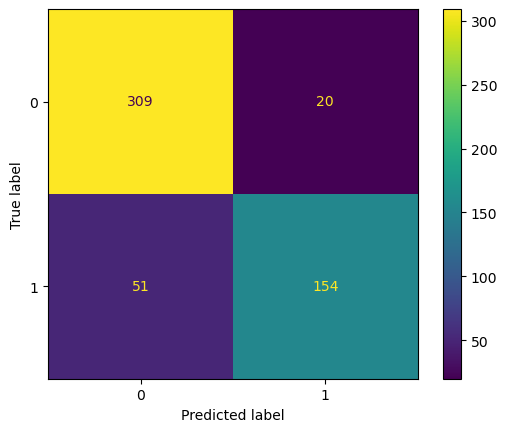

In [157]:
plot_confusion_matrix(rf2, X_train, y_train)

In [158]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       329
           1       0.89      0.75      0.81       205

    accuracy                           0.87       534
   macro avg       0.87      0.85      0.85       534
weighted avg       0.87      0.87      0.86       534



### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [159]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)

f1_m2 = 2 * ((precision*recall)/(precision+recall))
f1_m2

0.812664907651715

In [160]:
print(f'Accuracy is: {accuracy2}')
print(f'Precision is: {tp/(tp+fp)}')
print(f'Recall is: {tp/(tp+fn)}')
print(f'Support is: {support}')
print(f'F1 Score is: {f1_m2}')
print(f'True Positive Rate is: {tp/(tp+fn)}')
print(f'False Positive Rate is: {fp/(fp+tn)}')
print(f'True Negative Rate is: {tn/(tn+fp)}')
print(f'False Negative Rate is: {fn/(fn+tp)}')

Accuracy is: 0.8670411985018727
Precision is: 0.8850574712643678
Recall is: 0.751219512195122
Support is: 534
F1 Score is: 0.812664907651715
True Positive Rate is: 0.751219512195122
False Positive Rate is: 0.060790273556231005
True Negative Rate is: 0.939209726443769
False Negative Rate is: 0.24878048780487805


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?


In [178]:
print('Model 1')
print(f'My training score is: {rf.score(X_train, y_train)}')
print(f'My validate score is: {rf.score(X_val, y_val)}')

Model 1
My training score is: 0.9157303370786517
My validate score is: 0.7663551401869159


In [179]:
print('Model 2')
print(f'My training score is: {rf2.score(X_train, y_train)}')
print(f'My validate score is: {rf2.score(X_val, y_val)}')

Model 2
My training score is: 0.8670411985018727
My validate score is: 0.7710280373831776


My metrics for the first model were:

- Accuracy is: 0.9456928838951311  
- Precision is: 0.9848024316109423  
- Recall is: 0.9310344827586207  
- Support is: 534  
- F1 Score is: 0.9571639586410636  
- True Positive Rate is: 0.9310344827586207  
- False Positive Rate is: 0.026881720430107527  
- True Negative Rate is: 0.9731182795698925  
- False Negative Rate is: 0.06896551724137931  

My metrics for the second model were:

- Accuracy is: 0.8670411985018727  
- Precision is: 0.8850574712643678  
- Recall is: 0.751219512195122  
- Support is: 534  
- F1 Score is: 0.812664907651715  
- True Positive Rate is: 0.751219512195122  
- False Positive Rate is: 0.060790273556231005  
- True Negative Rate is: 0.939209726443769  
- False Negative Rate is: 0.24878048780487805  


The first model performed better in virtually every regard for the in-sample data. I believe the reason for this was that I overfit my data by setting the depth to 10, and my min_sample_leaf to just 1. Adjusting those settings for my second model lowered all of my metrics on my in-sample data, but when I can my validate score, it actually beat my first model very slightly. There is absolutely room for improvement, but overall my second model is most likely what I would use if this was a project.